In [264]:
import torch
import intel_extension_for_pytorch as ipex
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [265]:
weight = 1.4
bias = 2.8

start = 0
end = 2
step = 0.005

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X.shape, y.shape

(torch.Size([400, 1]), torch.Size([400, 1]))

In [266]:
train_split = int(0.75 * len(X))
X_train, y_train, X_test, y_test = X[:train_split], y[:train_split], X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(300, 300, 100, 100)

In [267]:
def plot(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    plt.figure(figsize = (12, 10))
    
    plt.scatter(train_data, train_labels, c='g', s=5, label="Training data", )
    plt.scatter(test_data, test_labels, c='r', s=5, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='y', s=5, label="Predictions")
        
    plt.legend(prop={"size":12})

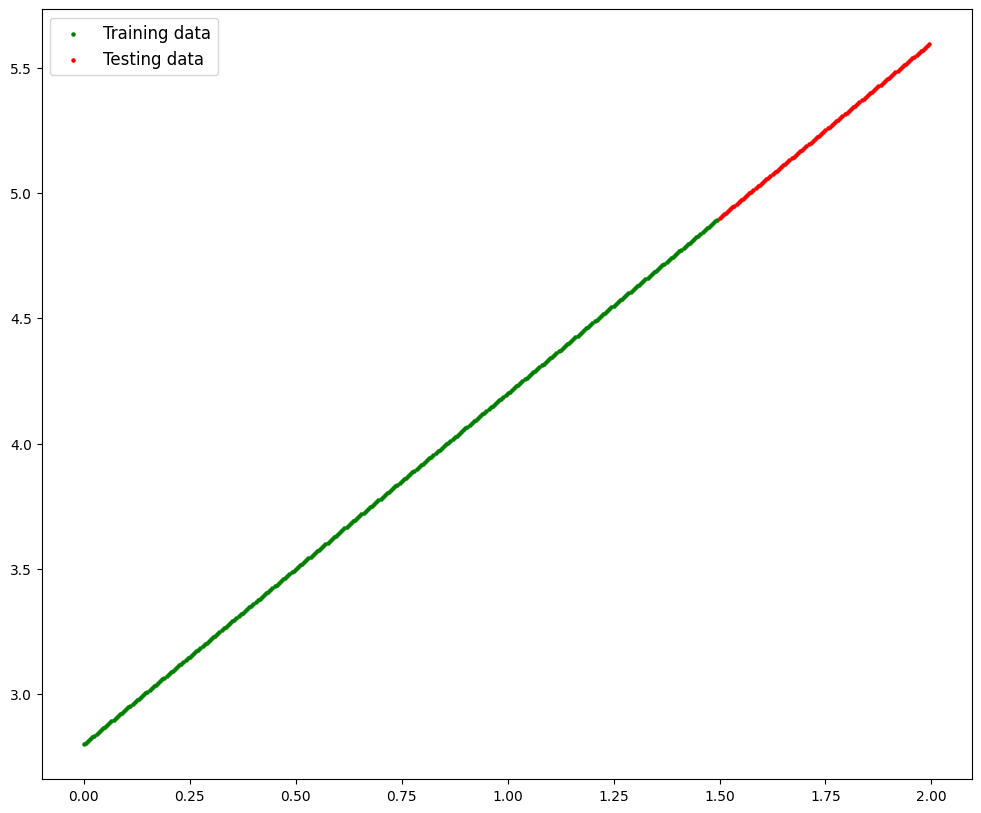

In [268]:
plot()

In [269]:
class LRM(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [270]:
torch.manual_seed(690)

model = LRM()

model.state_dict(), list(model.parameters())

(OrderedDict([('weights', tensor([1.3140])), ('bias', tensor([0.3418]))]),
 [Parameter containing:
  tensor([1.3140], requires_grad=True),
  Parameter containing:
  tensor([0.3418], requires_grad=True)])

In [271]:
with torch.inference_mode():
    y_preds= model(X_test)
y_preds

tensor([[2.3128],
        [2.3194],
        [2.3259],
        [2.3325],
        [2.3391],
        [2.3456],
        [2.3522],
        [2.3588],
        [2.3653],
        [2.3719],
        [2.3785],
        [2.3851],
        [2.3916],
        [2.3982],
        [2.4048],
        [2.4113],
        [2.4179],
        [2.4245],
        [2.4310],
        [2.4376],
        [2.4442],
        [2.4508],
        [2.4573],
        [2.4639],
        [2.4705],
        [2.4770],
        [2.4836],
        [2.4902],
        [2.4967],
        [2.5033],
        [2.5099],
        [2.5165],
        [2.5230],
        [2.5296],
        [2.5362],
        [2.5427],
        [2.5493],
        [2.5559],
        [2.5624],
        [2.5690],
        [2.5756],
        [2.5822],
        [2.5887],
        [2.5953],
        [2.6019],
        [2.6084],
        [2.6150],
        [2.6216],
        [2.6281],
        [2.6347],
        [2.6413],
        [2.6479],
        [2.6544],
        [2.6610],
        [2.6676],
        [2

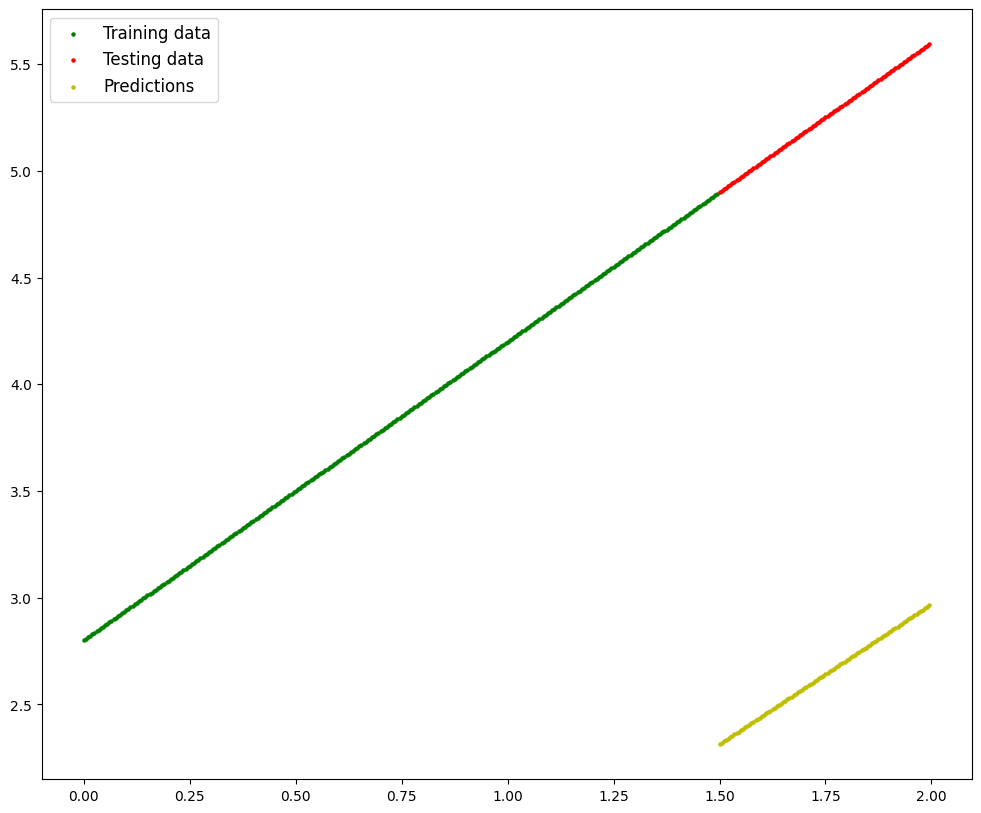

In [272]:
plot(predictions=y_preds)

In [273]:
loss_fn = torch.nn.L1Loss()
lr= 0.01
optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

In [274]:
torch.manual_seed(35525)
epochs = 600

loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 2.5224926471710205 | Test loss: 2.5810294151306152
Epoch: 10 | Train loss: 2.347742795944214 | Test loss: 2.306279182434082
Epoch: 20 | Train loss: 2.1729931831359863 | Test loss: 2.031529664993286
Epoch: 30 | Train loss: 1.9982432126998901 | Test loss: 1.7567799091339111
Epoch: 40 | Train loss: 1.823493242263794 | Test loss: 1.4820301532745361
Epoch: 50 | Train loss: 1.6487435102462769 | Test loss: 1.2072803974151611
Epoch: 60 | Train loss: 1.4739935398101807 | Test loss: 0.9325307607650757
Epoch: 70 | Train loss: 1.2992438077926636 | Test loss: 0.6577808856964111
Epoch: 80 | Train loss: 1.124493956565857 | Test loss: 0.3830312490463257
Epoch: 90 | Train loss: 0.9497440457344055 | Test loss: 0.1314540058374405
Epoch: 100 | Train loss: 0.7749941945075989 | Test loss: 0.17548111081123352
Epoch: 110 | Train loss: 0.6190764307975769 | Test loss: 0.4334878623485565
Epoch: 120 | Train loss: 0.5377007126808167 | Test loss: 0.6424693465232849
Epoch: 130 | Train loss: 0.

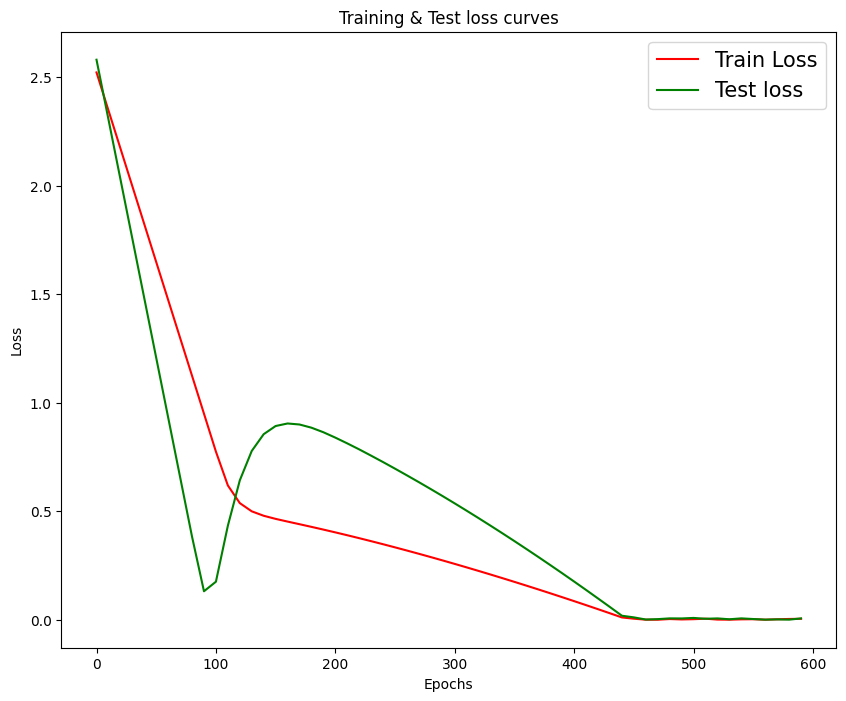

In [275]:
plt.figure(figsize = (10, 8))
plt.plot(epoch_count, loss_values, label="Train Loss", c='r')
plt.plot(epoch_count, test_loss_values, label="Test loss", c='g')
plt.title("Training & Test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(prop={"size": 15})

In [276]:
print(weight, bias)
print(model.state_dict())

1.4 2.8
OrderedDict([('weights', tensor([1.4002])), ('bias', tensor([2.7996]))])


In [277]:
model.eval()
with torch.inference_mode():
    y_pred_new = model(X_test)
y_pred_new

tensor([[4.8998],
        [4.9068],
        [4.9138],
        [4.9208],
        [4.9278],
        [4.9348],
        [4.9418],
        [4.9488],
        [4.9558],
        [4.9628],
        [4.9698],
        [4.9768],
        [4.9838],
        [4.9908],
        [4.9978],
        [5.0048],
        [5.0118],
        [5.0188],
        [5.0258],
        [5.0328],
        [5.0398],
        [5.0468],
        [5.0538],
        [5.0608],
        [5.0678],
        [5.0748],
        [5.0818],
        [5.0888],
        [5.0958],
        [5.1028],
        [5.1098],
        [5.1168],
        [5.1238],
        [5.1308],
        [5.1378],
        [5.1448],
        [5.1518],
        [5.1588],
        [5.1658],
        [5.1728],
        [5.1798],
        [5.1869],
        [5.1939],
        [5.2009],
        [5.2079],
        [5.2149],
        [5.2219],
        [5.2289],
        [5.2359],
        [5.2429],
        [5.2499],
        [5.2569],
        [5.2639],
        [5.2709],
        [5.2779],
        [5

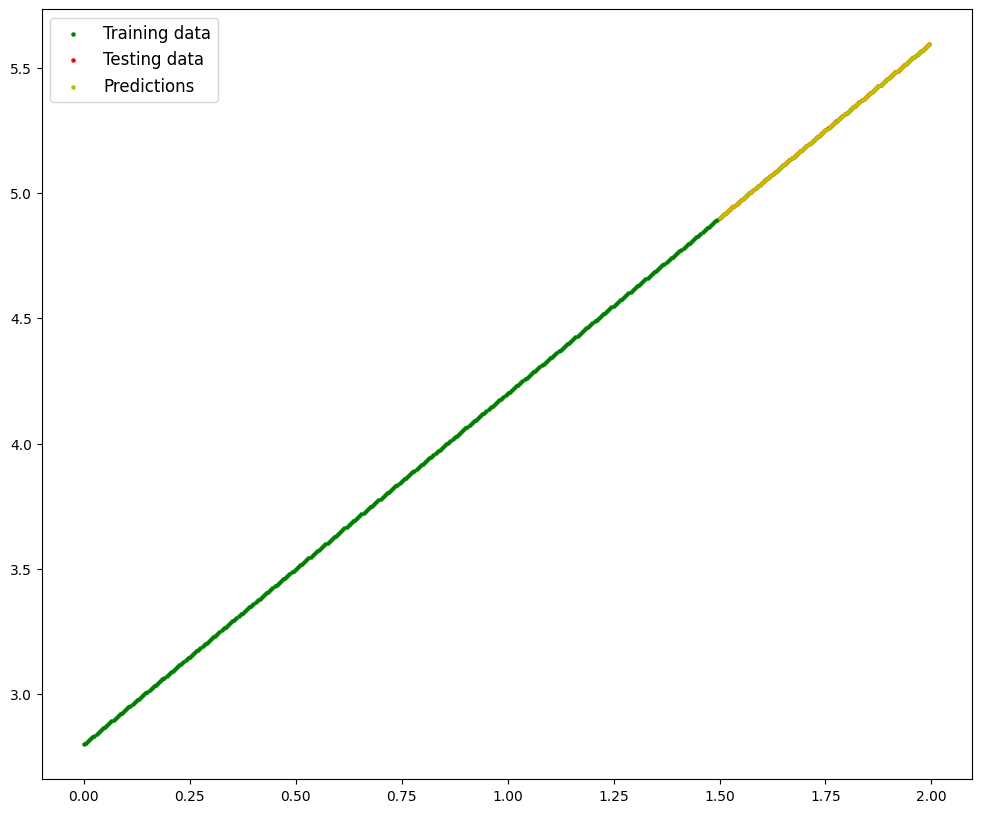

In [278]:
plot(predictions=y_pred_new)

In [279]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_save_path = model_path / "chapter_1_practice_3_model.pth"

#torch.save(model.state_dict(), model_save_path)
print(f"Saving model to :{model_save_path}")

Saving model to :models\chapter_1_practice_3_model.pth


In [280]:
newModel = LRM()
newModel.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [281]:
newModel.eval()
with torch.inference_mode():
    new_model_preds = newModel(X_test)
new_model_preds

tensor([[4.8998],
        [4.9068],
        [4.9138],
        [4.9208],
        [4.9278],
        [4.9348],
        [4.9418],
        [4.9488],
        [4.9558],
        [4.9628],
        [4.9698],
        [4.9768],
        [4.9838],
        [4.9908],
        [4.9978],
        [5.0048],
        [5.0118],
        [5.0188],
        [5.0258],
        [5.0328],
        [5.0398],
        [5.0468],
        [5.0538],
        [5.0608],
        [5.0678],
        [5.0748],
        [5.0818],
        [5.0888],
        [5.0958],
        [5.1028],
        [5.1098],
        [5.1168],
        [5.1238],
        [5.1308],
        [5.1378],
        [5.1448],
        [5.1518],
        [5.1588],
        [5.1658],
        [5.1728],
        [5.1798],
        [5.1869],
        [5.1939],
        [5.2009],
        [5.2079],
        [5.2149],
        [5.2219],
        [5.2289],
        [5.2359],
        [5.2429],
        [5.2499],
        [5.2569],
        [5.2639],
        [5.2709],
        [5.2779],
        [5

In [282]:
new_model_preds == y_pred_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        

In [414]:
device = "xpu" if torch.xpu.is_available() else "cpu"
device

'xpu'

In [415]:
weight = 48
bias = 198

start = -10
end = 10
step = 0.0001

A = torch.arange(start, end, step).unsqueeze(dim=1) 
#y = weight * X**2 + bias
B = weight * A + bias
A.shape, B.shape

(torch.Size([200000, 1]), torch.Size([200000, 1]))

In [416]:
train_split = int (0.75 * len(A))
A_train, B_train, A_test, B_test = A[:train_split], B[:train_split], A[train_split:], B[train_split:]
len(A_train), len(B_train), len(A_test), len(B_test) 

(150000, 150000, 50000, 50000)

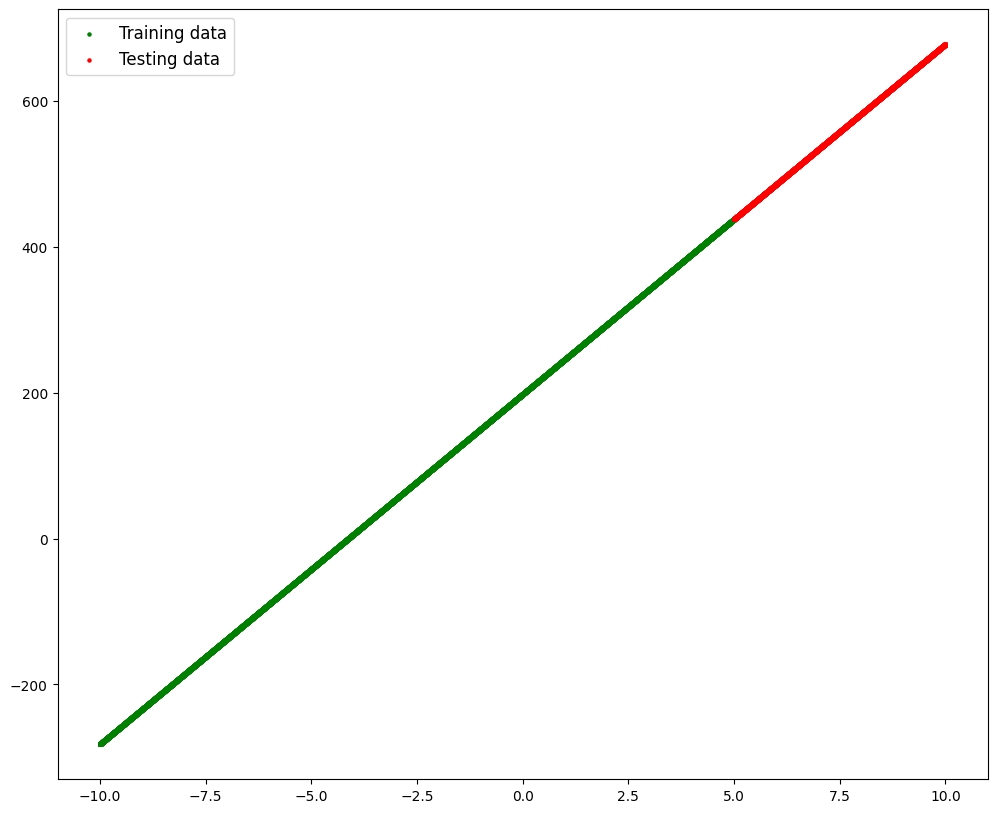

In [417]:
plot(A_train, B_train, A_test, B_test)

In [418]:
class LRM2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        #self.bilinear_layer = nn.Bilinear(1, 1, 1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
        
    #def forward(self, x1: torch.Tensor, x2: torch.tensor) -> (torch.Tensor, torch.Tensor):
        #return self.bilinear_layer(x1, x2)

In [419]:
torch.manual_seed(636)
model_0 = LRM2()
model_0, model_0.state_dict()

(LRM2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.7967]])),
              ('linear_layer.bias', tensor([-0.0739]))]))

In [420]:
next(model_0.parameters()).device

device(type='cpu')

In [421]:
model_0.to(device)
next(model_0.parameters()).device

device(type='xpu', index=0)

In [422]:
loss_fn = torch.nn.MSELoss()
lr = 0.01
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=lr)

loss_fn = loss_fn.to(device)
#model_0, optimizer = ipex.optimize(model_0, optimizer=optimizer)

In [423]:
A_train = A_train.to(device)
B_train = B_train.to(device)
A_test = A_test.to(device)
B_test = B_test.to(device)

A_train.device, B_train.device, A_test.device, B_test.device

(device(type='xpu', index=0),
 device(type='xpu', index=0),
 device(type='xpu', index=0),
 device(type='xpu', index=0))

In [424]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.7967]], device='xpu:0')),
             ('linear_layer.bias', tensor([-0.0739], device='xpu:0'))])

In [425]:
torch.manual_seed(472)
epochs = 1000

for epoch in range(epochs):
    model_0.train()
    b_pred = model_0(A_train)
    loss = loss_fn(b_pred, B_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(A_test)
        test_loss = loss_fn(test_pred, B_test)
        
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss; {test_loss}")

Epoch: 0 | Train loss: 50434.12890625 | Test loss; 208400.015625
Epoch: 100 | Train loss: 1521.2464599609375 | Test loss; 6229.5458984375
Epoch: 200 | Train loss: 76.37539672851562 | Test loss; 312.75885009765625
Epoch: 300 | Train loss: 3.8344783782958984 | Test loss; 15.702207565307617
Epoch: 400 | Train loss: 0.19249972701072693 | Test loss; 0.7882823348045349
Epoch: 500 | Train loss: 0.009671561419963837 | Test loss; 0.03960838168859482
Epoch: 600 | Train loss: 0.00048540160059928894 | Test loss; 0.001987385330721736
Epoch: 700 | Train loss: 2.4303504687850364e-05 | Test loss; 9.96784947346896e-05
Epoch: 800 | Train loss: 1.3223673249740386e-06 | Test loss; 5.391103059082525e-06
Epoch: 900 | Train loss: 1.9052977506817115e-07 | Test loss; 8.239483690886118e-07


In [426]:
print(f"New models parameters: {model_0.state_dict()}")
print(f"Weight: {weight} & bias: {bias}")

New models parameters: OrderedDict([('linear_layer.weight', tensor([[47.9999]], device='xpu:0')), ('linear_layer.bias', tensor([197.9995], device='xpu:0'))])
Weight: 48 & bias: 198


In [428]:
model_0.eval()
with torch.inference_mode():
    b_preds = model_0(A_test)
b_preds

tensor([[437.9992],
        [438.0040],
        [438.0088],
        ...,
        [677.9846],
        [677.9894],
        [677.9941]], device='xpu:0')

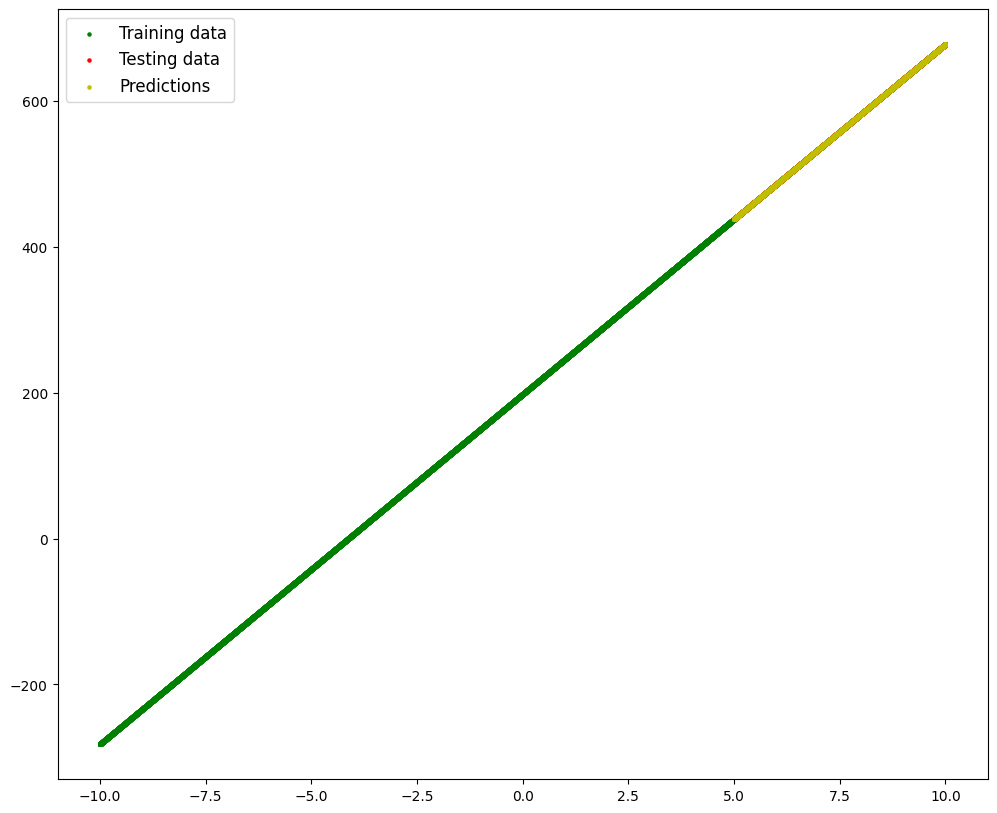

In [432]:
plot(A_train.cpu(), B_train.cpu(), A_test.cpu(), B_test.cpu(), predictions = b_preds.cpu())

In [434]:
from saveModel import save_model

save_model(model_0, "chapter_1_practice_3_model_0.pth")

models\chapter_1_practice_3_model_0.pth
Saving model to: models\chapter_1_practice_3_model_0.pth


In [437]:
loadedModel = LRM2()

loadedModel.load_state_dict(torch.load('models/chapter_1_practice_3_model_0.pth'))

loadedModel.to(device)

LRM2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [438]:
loadedModel.eval()
with torch.inference_mode():
    preds_new = loadedModel(A_test)
preds_new == b_preds

tensor([[True],
        [True],
        [True],
        ...,
        [True],
        [True],
        [True]], device='xpu:0')